In [28]:
#importing required librarires

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
#importing data

import pandas as pd
df=pd.read_csv(r"C:\anaconda\New folder (2)\gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
#EDA
df.shape


df.isna().sum()

df.columns


df.describe()



for i in df.columns:
    print(df[i].value_counts())
    print()


20.1350    5
25.9690    5
14.0430    5
20.1690    5
20.7200    5
          ..
17.7090    1
17.2890    1
17.1100    1
17.2850    1
6.9279     1
Name: AT, Length: 12086, dtype: int64

1011.80    129
1012.10    127
1011.90    121
1010.80    119
1013.60    118
          ... 
996.30       1
998.02       1
998.48       1
998.88       1
1029.80      1
Name: AP, Length: 540, dtype: int64

100.140    31
100.150    29
100.110    28
100.120    24
100.130    19
           ..
57.187      1
60.104      1
62.370      1
67.608      1
97.533      1
Name: AH, Length: 12637, dtype: int64

4.5032    7
4.4361    6
3.8837    6
4.4273    6
4.2500    6
         ..
4.5599    1
4.6085    1
4.5880    1
4.5110    1
3.4770    1
Name: AFDP, Length: 11314, dtype: int64

25.487    9
25.552    9
24.308    9
24.288    9
24.361    9
         ..
25.686    1
22.525    1
25.485    1
20.980    1
19.164    1
Name: GTEP, Length: 8234, dtype: int64

1100.0    761
1099.9    598
1100.1    592
1100.2    415
1099.8    368
        

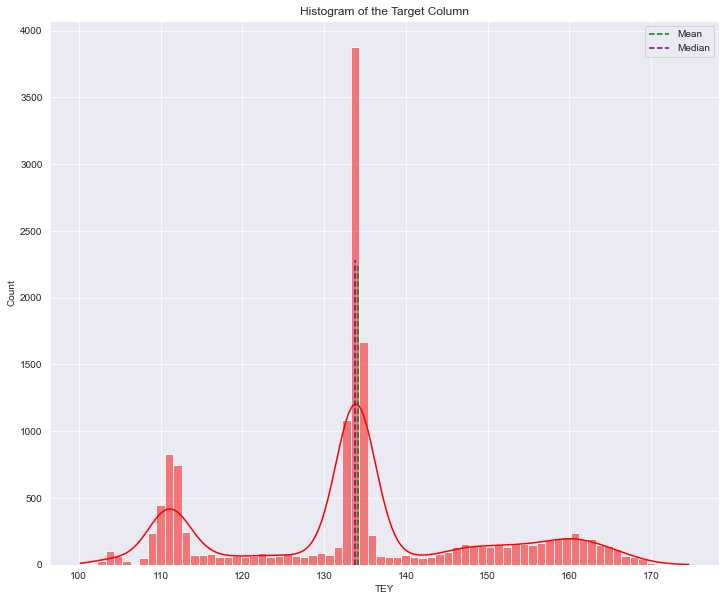

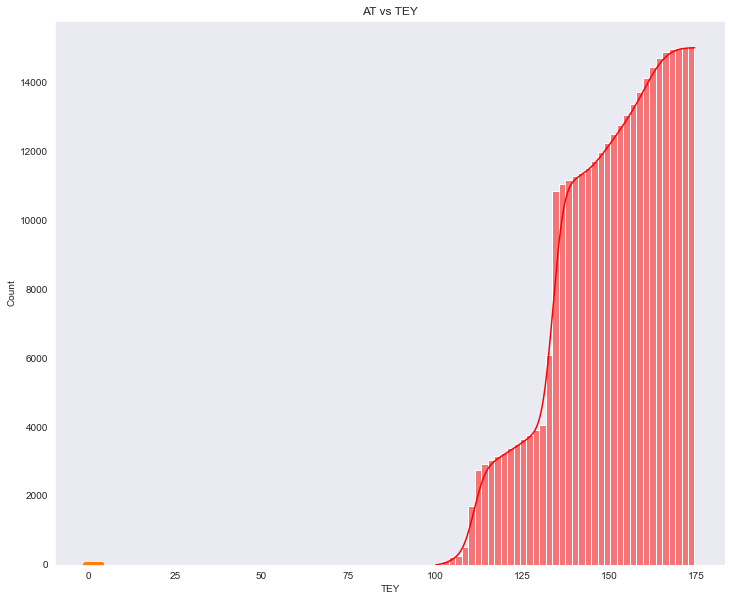

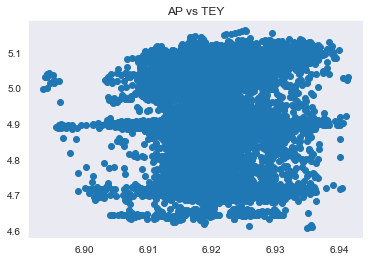

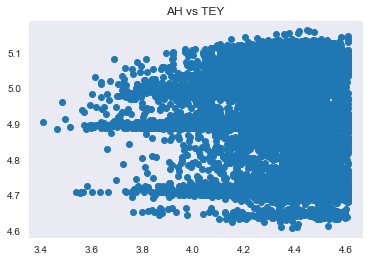

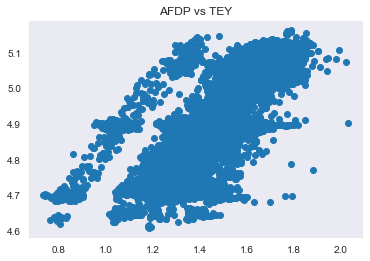

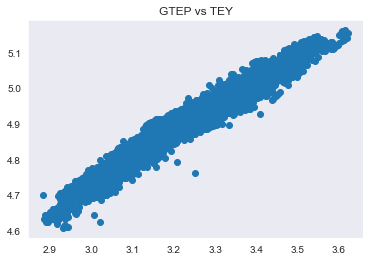

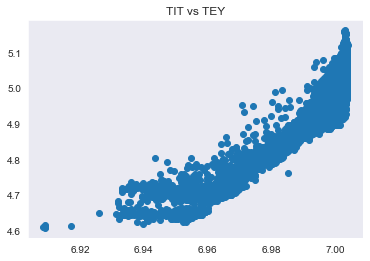

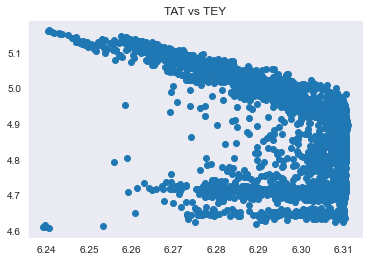

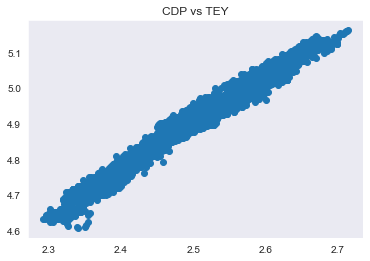

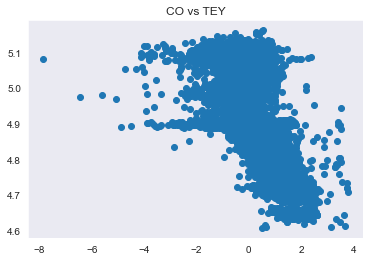

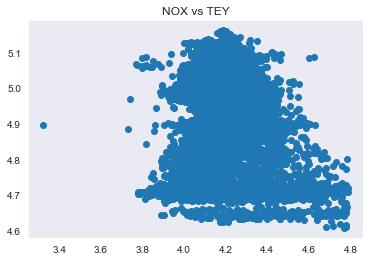

<AxesSubplot:>

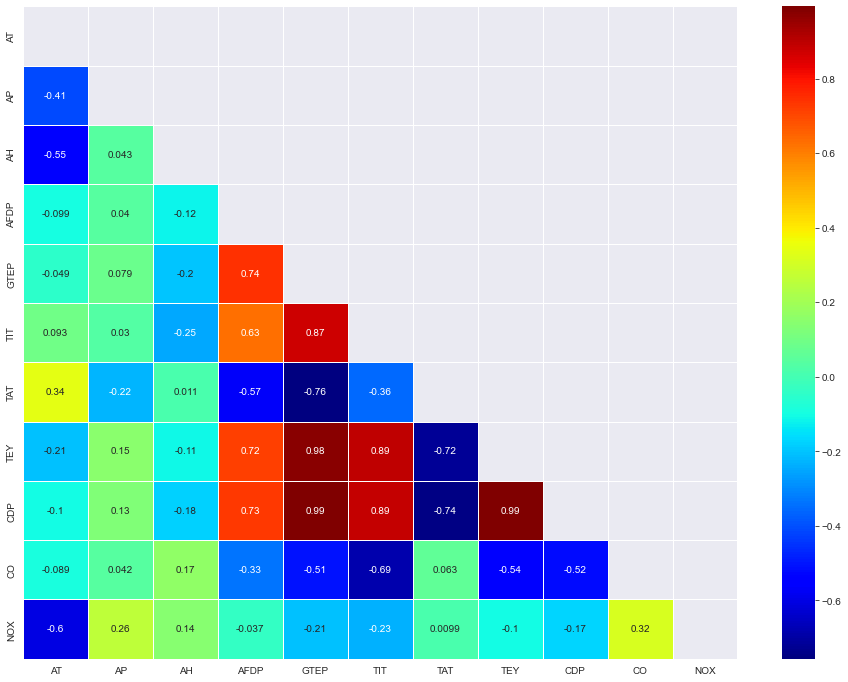

In [5]:
#visualization

sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")



plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")



#Let's now proceed by drawing a pairplot to visually examine the correlation between the features.
for i in df.columns:
    if i!="TEY": 
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()


# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)


In [6]:
#split the data into x and y

X=df.drop(["TEY"],axis=1)
y=df["TEY"]

In [7]:
#split the data into train and test
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=0.30,random_state=12)


In [8]:
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train


X_test = scale.fit_transform(x_test)
X_test


array([[0.48901631, 0.64730729, 0.79559177, ..., 0.14251161, 0.2722068 ,
        0.36474603],
       [0.42593371, 0.7001056 , 0.80973386, ..., 0.32060235, 0.05263161,
        0.26401103],
       [0.18358237, 0.55860612, 0.88941321, ..., 0.34498498, 0.0277572 ,
        0.50666754],
       ...,
       [0.2904598 , 0.76768743, 0.90370186, ..., 0.1300277 , 0.11084235,
        0.55078094],
       [0.30325196, 0.79725449, 0.39893898, ..., 0.8041587 , 0.01123793,
        0.26743667],
       [0.37655072, 0.48468849, 0.99897415, ..., 0.28471111, 0.73249871,
        0.35924662]])

In [15]:
#Model Training
#Tuning of Hyperparameter : Batch size and Epoch
# create model

def regression_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    
    oppti = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error',optimizer = oppti,metrics=['mae','mse'])
    return model
    
model1 = KerasRegressor(build_fn=regression_model, verbose=0)
batch_size = [10,50,100]
epochs = [40,70,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model1, param_grid=param_grid, cv = KFold(),verbose=5)
grid_res = gsv.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....batch_size=10, epochs=40;, score=-17983.838 total time=  47.5s
[CV 2/5] END .....batch_size=10, epochs=40;, score=-17884.646 total time=  46.1s
[CV 3/5] END .....batch_size=10, epochs=40;, score=-17947.232 total time=  46.8s
[CV 4/5] END .....batch_size=10, epochs=40;, score=-18139.010 total time=  49.0s
[CV 5/5] END .....batch_size=10, epochs=40;, score=-18041.299 total time=  47.0s
[CV 1/5] END .....batch_size=10, epochs=70;, score=-17983.838 total time= 1.4min
[CV 2/5] END .....batch_size=10, epochs=70;, score=-17884.646 total time= 1.3min
[CV 3/5] END .....batch_size=10, epochs=70;, score=-17947.232 total time= 1.3min
[CV 4/5] END .....batch_size=10, epochs=70;, score=-18139.010 total time= 1.3min
[CV 5/5] END .....batch_size=10, epochs=70;, score=-18041.299 total time= 1.4min
[CV 1/5] END ....batch_size=10, epochs=100;, score=-17983.838 total time= 1.9min
[CV 2/5] END ....batch_size=10, epochs=100;, scor

In [16]:
print(grid_res.best_score_,grid_res.best_params_)

-17999.202734375 {'batch_size': 100, 'epochs': 40}


In [17]:
#Turning Hyperparameter: Learning rate and Dropout rate
def regression_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator= model, param_grid=param_grid, cv=KFold() ,verbose=5)
grid_res = gsv.fit(x_train,y_train)
    

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17983.834 total time=   6.7s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17884.643 total time=   6.1s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=-17947.230 total time=   6.2s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18139.010 total time=   6.2s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=-18041.297 total time=   6.0s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17983.834 total time=   6.3s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17884.643 total time=   6.7s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=-17947.230 total time=   6.1s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18139.010 total time=   6.1s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=-18041.297 total time=   6.5s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=-17983

In [18]:
print(grid_res.best_params_,grid_res.best_score_)


{'dropout_rate': 0.0, 'learning_rate': 0.1} -17999.202734375


In [19]:
#Tuning of Hyperparameter :Activation Function & Kernel Initializer
def regression_model(activation_function,inti):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=0.1)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
activation_function = ['relu', 'tanh','softmax','linear']
inti = ['uniform', 'zero','normal']
param_grid = dict(activation_function = activation_function,inti = inti)
gsv_m = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose = 5)
grid_resu = gsv_m.fit(x_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation_function=relu, inti=uniform;, score=-17983.834 total time=   6.2s
[CV 2/5] END activation_function=relu, inti=uniform;, score=-17884.643 total time=   5.8s
[CV 3/5] END activation_function=relu, inti=uniform;, score=-17947.230 total time=   6.5s
[CV 4/5] END activation_function=relu, inti=uniform;, score=-18139.010 total time=   5.9s
[CV 5/5] END activation_function=relu, inti=uniform;, score=-18041.297 total time=   6.1s
[CV 1/5] END activation_function=relu, inti=zero;, score=-17983.834 total time=   5.6s
[CV 2/5] END activation_function=relu, inti=zero;, score=-17884.643 total time=   5.5s
[CV 3/5] END activation_function=relu, inti=zero;, score=-17947.230 total time=   5.6s
[CV 4/5] END activation_function=relu, inti=zero;, score=-18139.010 total time=   5.4s
[CV 5/5] END activation_function=relu, inti=zero;, score=-18041.297 total time=   5.3s
[CV 1/5] END activation_function=relu, inti=normal;, s

In [20]:
 print(grid_resu.best_score_,grid_resu.best_params_)   

-17999.202734375 {'activation_function': 'relu', 'inti': 'uniform'}


In [21]:
#Tuning of Hyperparameter :Number of Neurons in hidden layer
def regression_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(8,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation= 'sigmoid'))
    adam = Adam(learning_rate= 0.1)
    model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae','mse'])
    return model
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
neuron1 = [16,12,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2 = neuron2)
gsvp = GridSearchCV(estimator = model,param_grid = param_grid,cv=KFold(),verbose=5)
grid_result = gsvp.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......neuron1=16, neuron2=12;, score=-17983.834 total time=   5.8s
[CV 2/5] END .......neuron1=16, neuron2=12;, score=-17884.643 total time=   5.3s
[CV 3/5] END .......neuron1=16, neuron2=12;, score=-17947.230 total time=   5.6s
[CV 4/5] END .......neuron1=16, neuron2=12;, score=-18139.010 total time=   5.4s
[CV 5/5] END .......neuron1=16, neuron2=12;, score=-18041.297 total time=   5.4s
[CV 1/5] END ........neuron1=16, neuron2=8;, score=-17983.844 total time=   5.4s
[CV 2/5] END ........neuron1=16, neuron2=8;, score=-17884.643 total time=   6.1s
[CV 3/5] END ........neuron1=16, neuron2=8;, score=-17947.230 total time=   5.6s
[CV 4/5] END ........neuron1=16, neuron2=8;, score=-18139.020 total time=   5.3s
[CV 5/5] END ........neuron1=16, neuron2=8;, score=-18041.297 total time=   5.3s
[CV 1/5] END ........neuron1=16, neuron2=4;, score=-17983.834 total time=   5.6s
[CV 2/5] END ........neuron1=16, neuron2=4;, scor

In [22]:
print(grid_result.best_score_,grid_result.best_params_)

-17999.202734375 {'neuron1': 16, 'neuron2': 12}


In [23]:
# Best parametes
# batch_size: 100 
# epochs: 40
# dropout_rate: 0.0 
# learning_rate: 0.1
# activation_function: relu 
# inti: uniform
# neuron1: 16 
# neuron2: 12 
model = Sequential()
model.add(Dense(16,input_dim = 10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(12,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dropout(0.0))
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
optimizer = RMSprop(learning_rate=0.1)
model.compile(loss='mse',optimizer = optimizer,metrics=['mae','mse'])
model.fit(x_train,y_train,batch_size=100,epochs=40)
y_pred = model.predict(x_train)

Epoch 1/40
106/106 [==============================] - 1s 2ms/step - loss: 18266.6387 - mae: 134.2221 - mse: 18266.6367
Epoch 2/40
106/106 [==============================] - 0s 3ms/step - loss: 18266.6387 - mae: 134.2221 - mse: 18266.6387
Epoch 3/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6309 - mae: 134.2221 - mse: 18266.6309
Epoch 4/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6367 - mae: 134.2221 - mse: 18266.6367
Epoch 5/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6328 - mae: 134.2221 - mse: 18266.6328
Epoch 6/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6309 - mae: 134.2221 - mse: 18266.6309
Epoch 7/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6387 - mae: 134.2221 - mse: 18266.6387
Epoch 8/40
106/106 [==============================] - 0s 2ms/step - loss: 18266.6367 - mae: 134.2221 - mse: 18266.6348
Epoch 9/40
106/106 [============================

In [24]:
# testing data
test_score = model.evaluate(x_test,y_test)



141/141 [==============================] - 0s 2ms/step - loss: 18234.8770 - mae: 134.1100 - mse: 18234.8770


In [29]:
y_test_pred = model.predict(x_test)
mean_absolute_error(y_test,y_test_pred)

141/141 [==============================] - 0s 2ms/step


134.10995567375886

In [30]:
mean_squared_error(y_test,y_test_pred)

18234.877264184393